<h1>GESIS Summer School in Survey Methodology 2018:<br> Meta-Analysis in Social Research and Survey Methodology<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Exercise-(BCG)" data-toc-modified-id="Exercise-(BCG)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise (BCG)</a></span></li><li><span><a href="#Exercise-(Raudenbush)" data-toc-modified-id="Exercise-(Raudenbush)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise (Raudenbush)</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [12]:
source("run_me_first.R")

## Exercise (BCG)

Open the BCG data, estimate a random effects model and check which studies can be considered outliers. Use the (a) outlier table: which study has the highest cook’s d value, (b) plot cook’s d and (c) provide an interpretation of the normal-quartile plot.

In [13]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res <- (rma(yi, vi, data=dat.bcg, digits=3) )
res


Random-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.313 (SE = 0.166)
tau (square root of estimated tau^2 value):      0.560
I^2 (total heterogeneity / total variability):   92.22%
H^2 (total variability / sampling variability):  12.86

Test for Heterogeneity: 
Q(df = 12) = 152.233, p-val < .001

Model Results:

estimate     se    zval   pval   ci.lb   ci.ub     
  -0.715  0.180  -3.974  <.001  -1.067  -0.362  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [14]:
## Solution.
inf <- influence(res)
inf

   rstudent dffits cook.d cov.r tau2.del  QE.del   hat weight   dfbs inf
1    -0.218 -0.041  0.002 1.116    0.336 151.583 0.051  5.059 -0.040    
2    -1.292 -0.344  0.113 1.010    0.293 145.318 0.064  6.365 -0.346    
3    -0.755 -0.160  0.026 1.067    0.321 150.197 0.044  4.436 -0.160    
4    -1.451 -0.520  0.229 0.965    0.263  96.563 0.097  9.699 -0.514    
5     0.848  0.271  0.076 1.138    0.328 151.320 0.089  8.868  0.271    
6    -0.118 -0.019  0.000 1.241    0.360 128.187 0.101 10.096 -0.019    
7    -1.304 -0.336  0.109 1.008    0.293 145.830 0.060  6.027 -0.339    
8     1.450  0.477  0.199 1.001    0.273  67.986 0.102 10.189  0.471    
9     0.408  0.142  0.022 1.197    0.349 152.205 0.087  8.743  0.142    
10   -1.128 -0.349  0.117 1.051    0.299 139.827 0.084  8.368 -0.349    
11    0.669  0.232  0.058 1.186    0.340 151.466 0.099  9.925  0.233    
12    1.290  0.253  0.063 1.026    0.308 150.787 0.038  3.822  0.254    
13    1.188  0.355  0.123 1.065    0.304 149.788 0.

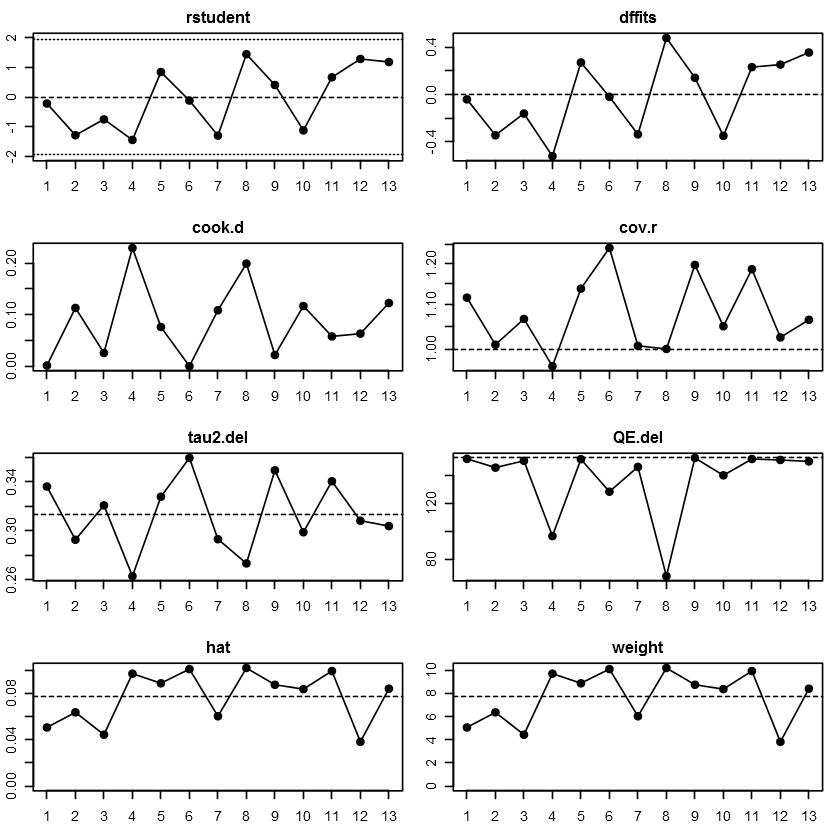

In [15]:
### Solution.
### Plot influence diagnostics.
plot(inf)

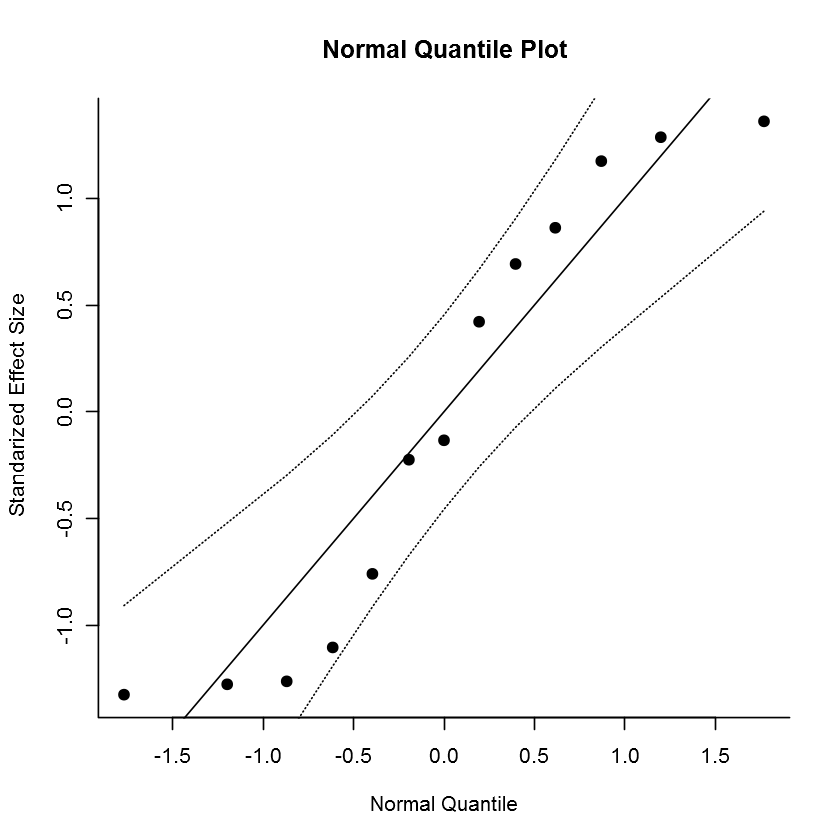

In [16]:
## Solution.
## Normal Quantile Plot: Plotting the quartiles of the effect size distribution against 
## the quartiles of the normal distribution.
qqnorm(res, type = "rstandard", pch = 19, envelope = TRUE, bonferroni = FALSE, 
       reps = 1000, smooth = TRUE, bass = 0, label = FALSE, offset = 0.3,
       main = "Normal Quantile Plot", xlab = "Normal Quantile", 
       ylab = "Standarized Effect Size")

## Exercise (Raudenbush)

Open the ` dat.raudenbush1985` (can also be found in `metafor`), estimate a random effects model and check which studies can be considered outliers. Use the (a) outlier table: which study has the highest cook’s d value, (b) plot cook’s d and (c) provide an interpretation of the normal-quartile plot.

In [17]:
## Solution.
## Random effects Model
library(metafor)
(res_rb <- rma(yi, vi, data = dat.raudenbush1985, digits = 3))


Random-Effects Model (k = 19; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.019 (SE = 0.016)
tau (square root of estimated tau^2 value):      0.137
I^2 (total heterogeneity / total variability):   41.86%
H^2 (total variability / sampling variability):  1.72

Test for Heterogeneity: 
Q(df = 18) = 35.830, p-val = 0.007

Model Results:

estimate     se   zval   pval   ci.lb  ci.ub   
   0.084  0.052  1.621  0.105  -0.018  0.185   

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [18]:
## Solution.
### estimate influence diagnostics
inf_rb <- influence(res_rb)
inf

   rstudent dffits cook.d cov.r tau2.del  QE.del   hat weight   dfbs inf
1    -0.218 -0.041  0.002 1.116    0.336 151.583 0.051  5.059 -0.040    
2    -1.292 -0.344  0.113 1.010    0.293 145.318 0.064  6.365 -0.346    
3    -0.755 -0.160  0.026 1.067    0.321 150.197 0.044  4.436 -0.160    
4    -1.451 -0.520  0.229 0.965    0.263  96.563 0.097  9.699 -0.514    
5     0.848  0.271  0.076 1.138    0.328 151.320 0.089  8.868  0.271    
6    -0.118 -0.019  0.000 1.241    0.360 128.187 0.101 10.096 -0.019    
7    -1.304 -0.336  0.109 1.008    0.293 145.830 0.060  6.027 -0.339    
8     1.450  0.477  0.199 1.001    0.273  67.986 0.102 10.189  0.471    
9     0.408  0.142  0.022 1.197    0.349 152.205 0.087  8.743  0.142    
10   -1.128 -0.349  0.117 1.051    0.299 139.827 0.084  8.368 -0.349    
11    0.669  0.232  0.058 1.186    0.340 151.466 0.099  9.925  0.233    
12    1.290  0.253  0.063 1.026    0.308 150.787 0.038  3.822  0.254    
13    1.188  0.355  0.123 1.065    0.304 149.788 0.

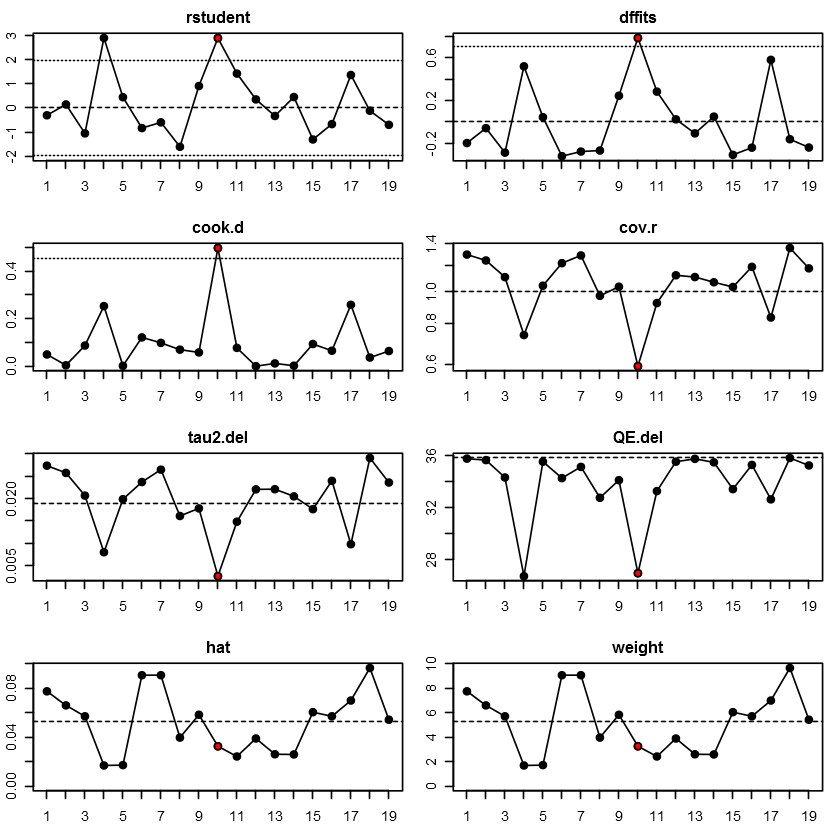

In [19]:
### plot the influence diagnostics
plot(inf_rb)

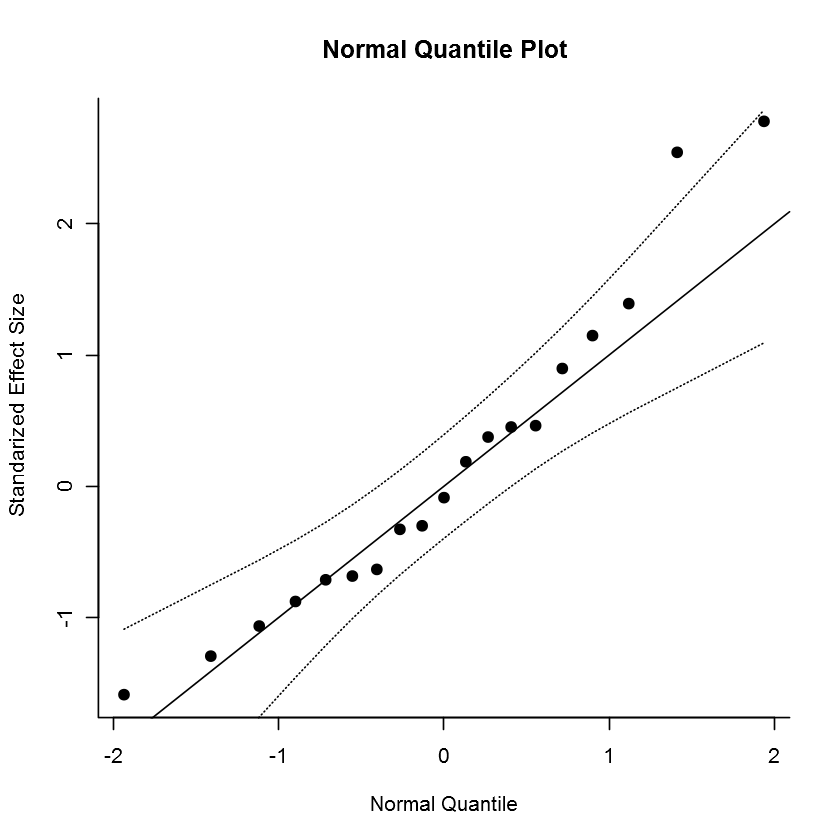

In [20]:
## Solution.
## Normal Quantile Plot: Plotting the quartiles of the effect size distribution against 
## the quartiles of the normal distribution.
qqnorm(res_rb, type = "rstandard", pch = 19, envelope = TRUE, bonferroni = FALSE, 
       reps = 1000, smooth = TRUE, bass = 0, label = FALSE, offset = 0.3,
       main = "Normal Quantile Plot", xlab = "Normal Quantile", 
       ylab = "Standarized Effect Size")